In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

from sklearn import tree

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv")
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


# Data Exporation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [4]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [5]:
# check the missing values
df.isnull().sum().sum()

425

# Clean The Data

In [6]:
# replace the missing values by zero
df.replace(np.nan,0, inplace = True)
df.head(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
5,CS-97006,A,B-,B,D+,C+,A-,C+,B,B+,...,C,B-,C+,C+,A-,A-,B+,B-,B,3.026
6,CS-97007,B-,C-,A-,D,A-,B,A,B+,A-,...,B-,C,B+,B-,A,A-,B+,B+,A,2.957
7,CS-97008,B+,B+,C+,C,C,A-,C-,A-,B,...,D+,B+,B+,C,A,B+,A-,A-,A-,3.043
8,CS-97009,A-,C,A-,D+,B,A-,A-,A-,B+,...,B+,B,B-,C+,A,A-,B+,A-,A,3.358
9,CS-97010,A,B,C+,B,B,A-,C,B-,A-,...,C+,B-,B+,B-,A,A,A-,B,A,3.247


In [7]:
input = df.drop(["CS-403","CS-421","CS-406","CS-414","CS-419","CS-423","CS-412", 'MT-442',"Seat No.","CGPA"], axis=1)
target = df[["CGPA"]]

In [8]:
target.head()

,CGPA
0,2.205
1,2.008
2,3.608
3,1.906
4,3.448


In [9]:
pd.unique(df["PH-121"])

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+',
       'F'], dtype=object)

In [10]:
grades_enc = {'B-':2.7, 'A':4, 'D':1.0, 'A-':3.7, 'B+':3.4, 'B':3.0, 'C+':2.4, 'C':2.0, 'C-':1.7, 'D+':1.4, 'WU':0.0, 'A+':4,'F':0.0,'W':0,'I':0}
type(input)

pandas.core.frame.DataFrame

In [11]:
for item in input:
      input[item] = input[item].replace(grades_enc)
input.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,2.4,3.0,2.0,2.4,2.0,1.7,2.0,1.7,1.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.7,3.7,1.4,1.7,2.0,3.7,1.0,1.4,1.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,2.4,4.0,3.4,3.7,3.0,3.4,3.7,3.7,3.0,3.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.0,2.7,1.0,2.7,1.4,1.4,3.4,1.7,1.4,2.0
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,1.7,3.7,2.7,3.7,2.4,3.7,2.7,3.7,2.7,3.4


In [12]:
# Concating inputs and targets for data insights
df = pd.concat([input, target], axis=1)

# Discover and Visualize the Data to Gain Insights:

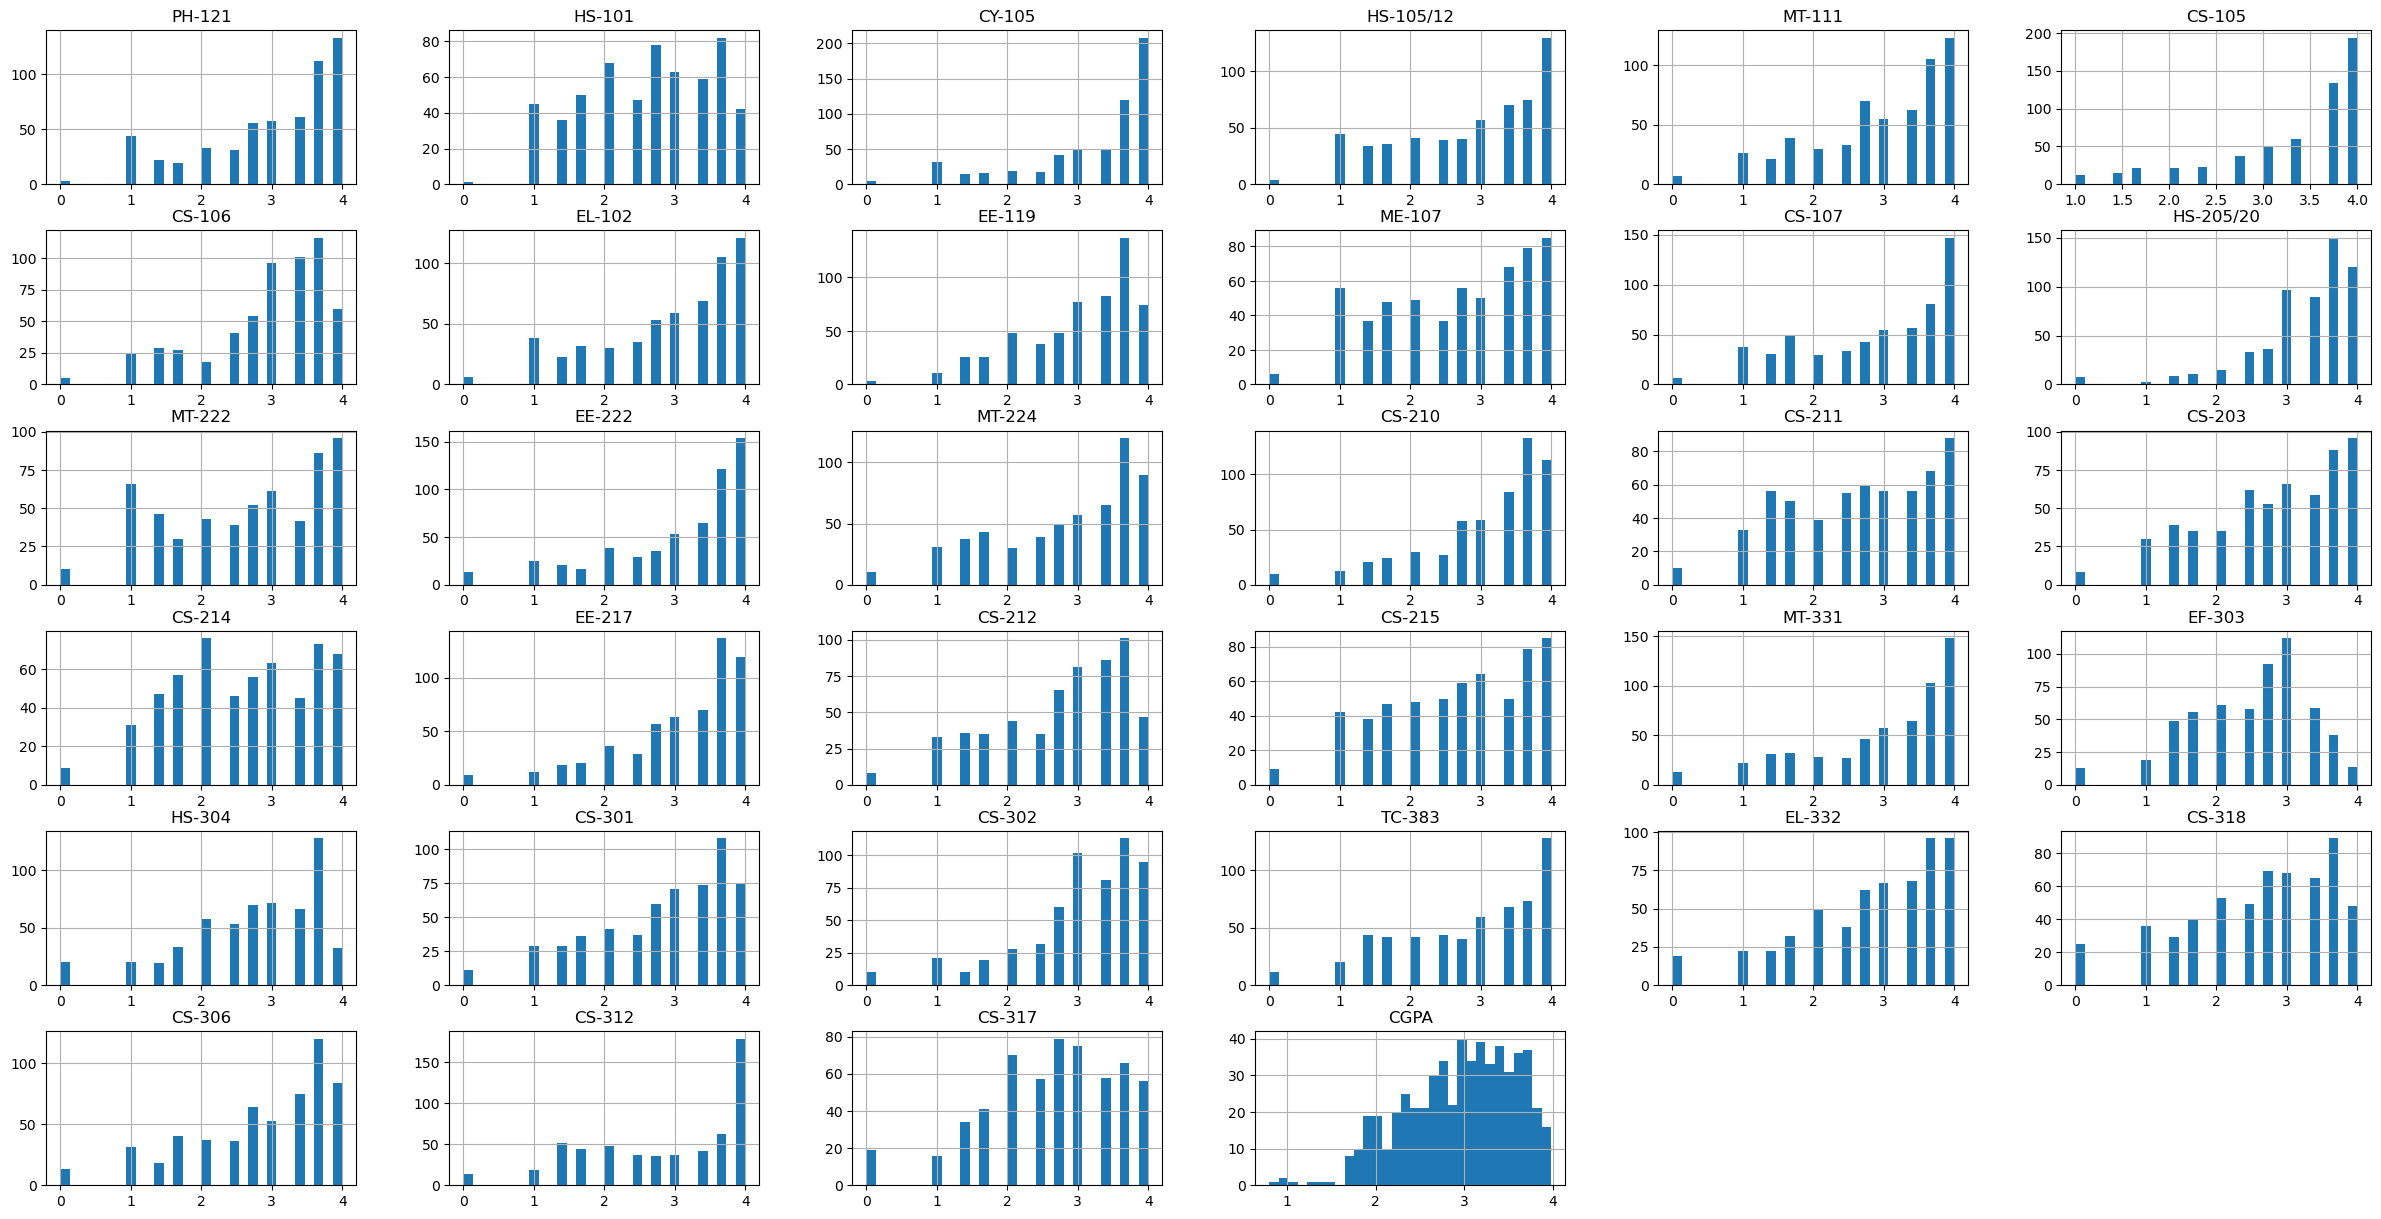

In [13]:
df.hist(bins=30,figsize=(30,15))
plt.show()

# Looking for Correlations

<Axes: >

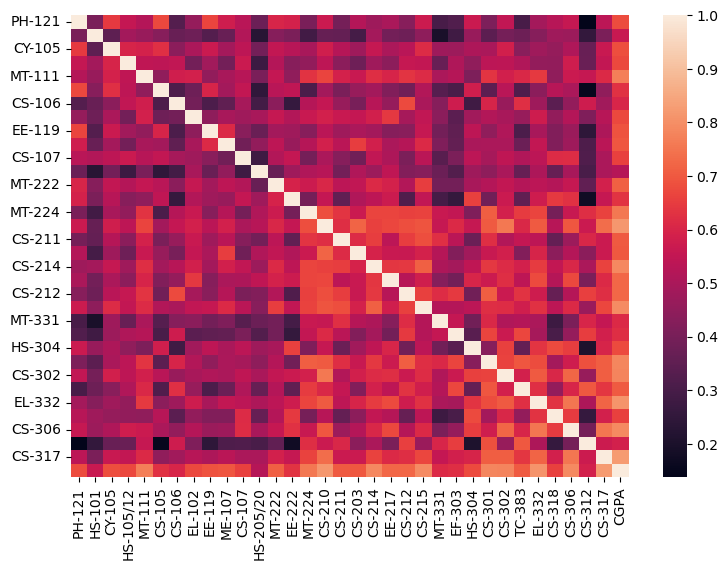

In [14]:
# Looking for correlations
plt.figure(figsize=(9,6))
sns.heatmap(df.corr())

In [15]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.018389,2.628371,3.262697,2.878984,2.988091,3.329247,2.961996,2.969877,3.020140,2.698599,...,2.761646,2.850788,3.050088,2.873730,2.863748,2.628371,2.892119,2.892294,2.651138,2.954888
std,0.971594,0.908402,0.932997,1.019208,0.954343,0.799826,0.869226,0.981676,0.839463,1.029323,...,0.955712,0.970483,0.877124,1.017053,1.009585,1.035205,0.989909,1.095450,0.952455,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.400000,2.000000,2.700000,2.000000,2.400000,3.000000,2.400000,2.400000,2.400000,1.700000,...,2.000000,2.000000,2.700000,2.000000,2.000000,2.000000,2.400000,2.000000,2.000000,2.538000
50%,3.400000,2.700000,3.700000,3.000000,3.400000,3.700000,3.000000,3.400000,3.400000,2.700000,...,3.000000,3.000000,3.400000,3.000000,3.000000,2.700000,3.000000,3.000000,2.700000,3.029000
75%,3.700000,3.400000,4.000000,3.700000,3.700000,4.000000,3.700000,3.700000,3.700000,3.700000,...,3.700000,3.700000,3.700000,3.700000,3.700000,3.400000,3.700000,4.000000,3.400000,3.451000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.985000


In [16]:
df.to_csv('cleaned_data.csv')

In [17]:
# Splitting file into different columns based on our model prediction requirement
model1_columns = []
model2_columns = []
model3_columns = []
for item in [input]:
 for i in item:
   if i[3]=='1':
    model1_columns.append(i)
   elif i[3]=='2':
    model2_columns.append(i)
   else:
    model3_columns.append(i)

model2_columns = model1_columns + model2_columns
model3_columns = model2_columns + model3_columns

# Prepare the data for Linear Regression:

# Model 1: Predict final CGPA based on GPs of first year only.

In [18]:
# Input data
labels = df['CGPA'].values
features = df[list(model1_columns)].values

In [19]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)

In [20]:
# Bulid a new Model
lr_1 = linear_model.LinearRegression()

# Train the Model
lr_1.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict for training set
y_train_predict = lr_1.predict(X_train)

# Predict for test set
y_test_predict = lr_1.predict(X_test)

In [22]:
input_lr=[]
input_lr.append([4, 3.0, 0, 0, 0, 1.0, 4, 2.0, 0, 4, 4])
print(input_lr )
print(lr_1.predict(input_lr ))

[[4, 3.0, 0, 0, 0, 1.0, 4, 2.0, 0, 4, 4]]
[2.0270342]


In [23]:
# model evaluation for training set
mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))
print("----------------------")

# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_test_predict) 
mae_test = mean_absolute_error(y_test, y_test_predict) 
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))
print("-----------------------")
test_score= lr_1.score(X_test, y_test) 
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

The model performance for training set
RMSE is 0.23532943164765563
MAE is 0.18082635128099817
----------------------
The model performance for testing set
RMSE is 0.23537308551098615
MAE is 0.19006836529547363
-----------------------
The score of model for testing set
Test score 0.85


In [24]:
compare={"Actual": y_test, "Predict": y_test_predict}
pd.DataFrame(compare)

,Actual,Predict
0,3.043,3.090070
1,3.164,3.112614
2,3.075,3.501006
3,1.493,0.887055
4,3.725,3.429377
...,...,...
167,1.863,2.571937
168,3.247,3.091371
169,3.516,3.375430
170,3.241,3.432891


In [25]:
# Visualize the Result
idx= np.random.choice(X_test.shape[0])
print ("Predicted CGPA :", y_test_predict[idx])
print ("Actual CGPA :", y_test[idx])

Predicted CGPA : 2.522299722550478
Actual CGPA : 2.069


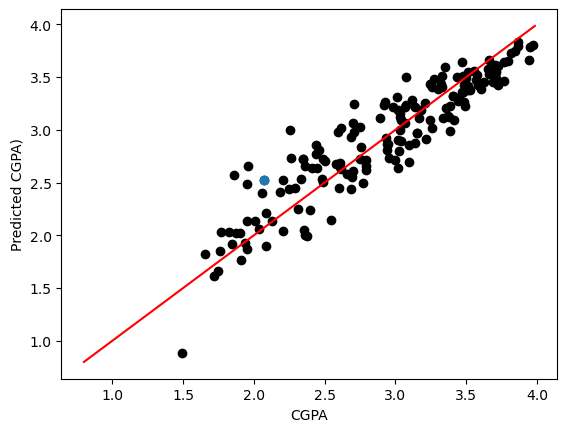

In [26]:
# visualization
plt.scatter(y_test, y_test_predict,  color='black')
plt.scatter(y_test[idx], y_test_predict[idx])
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA)')
plt.plot([df["CGPA"].min(), df["CGPA"].max()], [df["CGPA"].min(), df["CGPA"].max()], color='red')
plt.show()

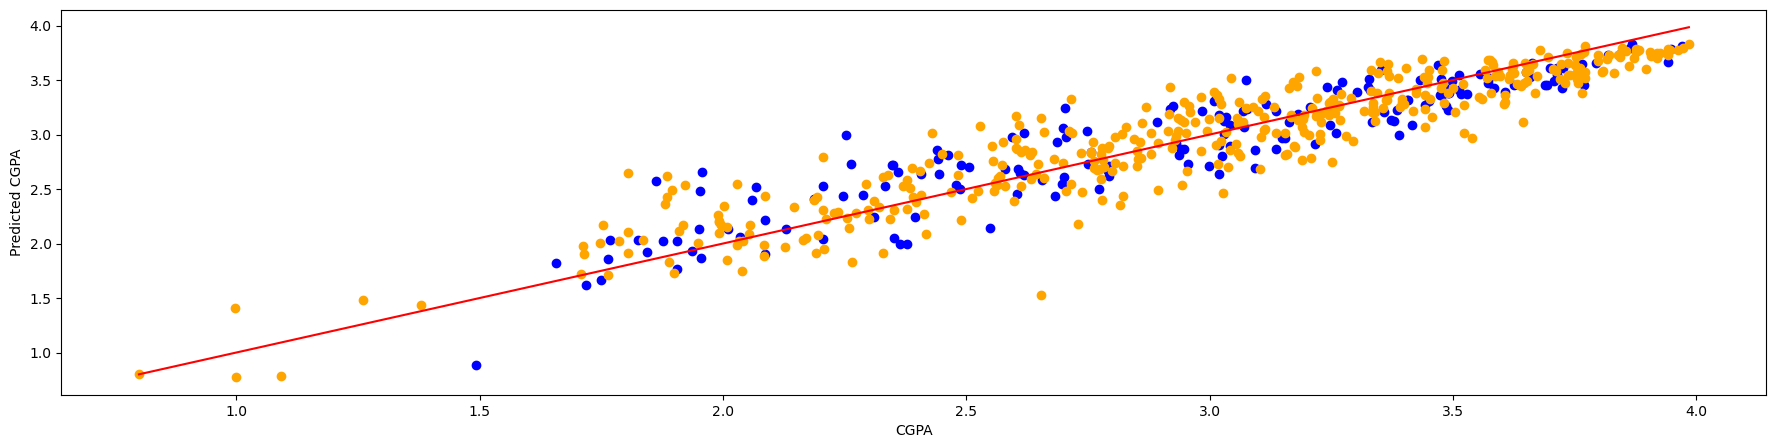

In [27]:
plt.figure(figsize=(22,5))
plt.scatter(y_test, y_test_predict,  color='blue')
plt.scatter(y_train, y_train_predict,  color='Orange')
plt.plot([df['CGPA'].min(), df['CGPA'].max()], [df['CGPA'].min(), df['CGPA'].max()], color='red')
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA')
plt.show()

# Model 2: Predict final CGPA based on GPs of first two years.

In [28]:
# Input data
labels = df['CGPA'].values
features = df[list(model2_columns)].values

In [29]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)

In [30]:
# Bulid a new Model
lr_2 = linear_model.LinearRegression()

# Train the Model
lr_2.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predict for training set
y_train_predict = lr_2.predict(X_train)

# Predict for test set
y_test_predict = lr_2.predict(X_test)

In [32]:
# model evaluation for training set
mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))
print("-------------------------")

# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_test_predict) 
mae_test = mean_absolute_error(y_test, y_test_predict) 
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))
print("-------------------------")
test_score= lr_2.score(X_test, y_test) 
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

The model performance for training set
RMSE is 0.15676973380443954
MAE is 0.1118934674162806
-------------------------
The model performance for testing set
RMSE is 0.2202769682978238
MAE is 0.13473592207934415
-------------------------
The score of model for testing set
Test score 0.89


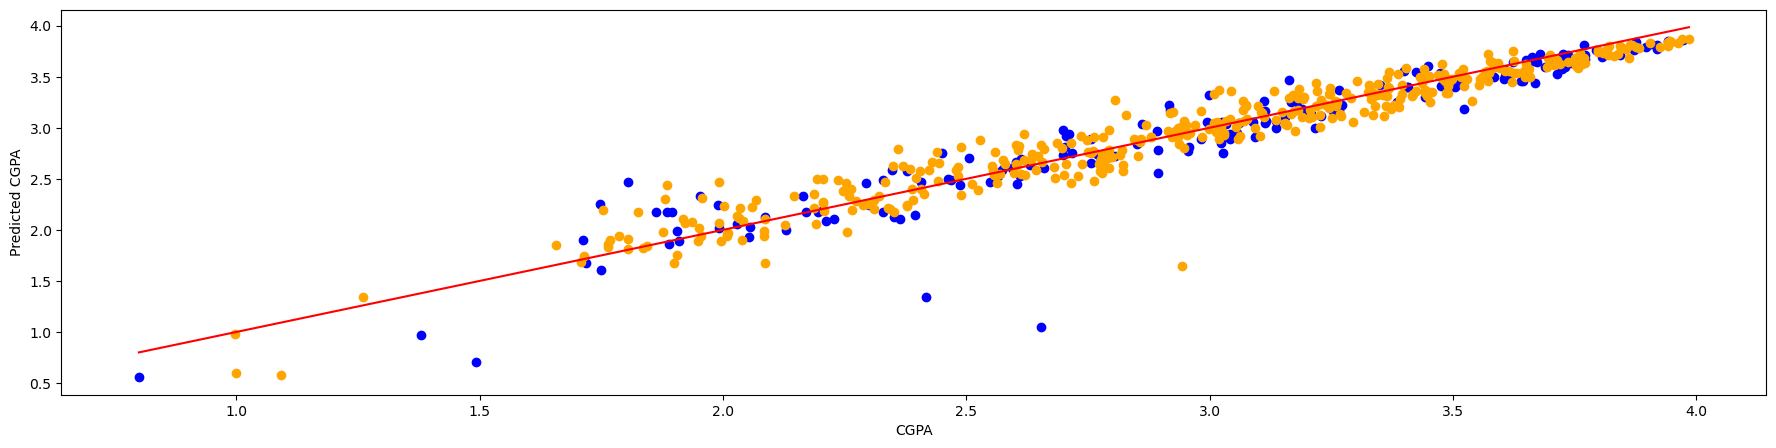

In [33]:
plt.figure(figsize=(22,5))
plt.scatter(y_test, y_test_predict,  color='blue')
plt.scatter(y_train, y_train_predict,  color='Orange')
plt.plot([df['CGPA'].min(), df['CGPA'].max()], [df['CGPA'].min(), df['CGPA'].max()], color='red')
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA')
plt.show()

# Model 3: Predict final CGPA based on GPs of first three years.

In [34]:
# Input data
labels = df['CGPA'].values
features = df[list(model3_columns)].values

In [35]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)

In [36]:
# Bulid a new Model
lr_3 = linear_model.LinearRegression()

# Train the Model
lr_3.fit(X_train, y_train)

LinearRegression()

In [37]:
# Predict for training set
y_train_predict = lr_3.predict(X_train)

# Predict for test set
y_test_predict = lr_3.predict(X_test)

In [38]:
# model evaluation for training set
mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))
print("--------------------------")

# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_test_predict) 
mae_test = mean_absolute_error(y_test, y_test_predict) 
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))
print("---------------------")
test_score= lr_3.score(X_test, y_test) 
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

The model performance for training set
RMSE is 0.14530726739492247
MAE is 0.09067733052115402
--------------------------
The model performance for testing set
RMSE is 0.12558903264641444
MAE is 0.08804454594949272
---------------------
The score of model for testing set
Test score 0.96


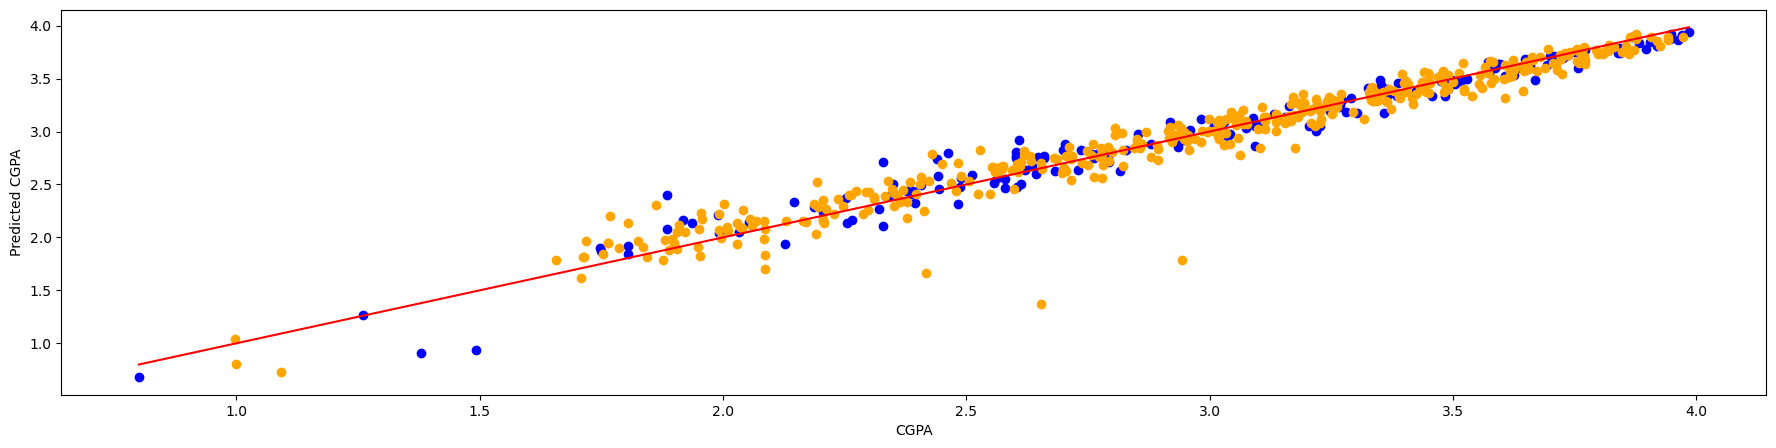

In [39]:
plt.figure(figsize=(22,5))
plt.scatter(y_test, y_test_predict,  color='blue')
plt.scatter(y_train, y_train_predict,  color='Orange')
plt.plot([df['CGPA'].min(), df['CGPA'].max()], [df['CGPA'].min(), df['CGPA'].max()], color='red')
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA')
plt.show()

# Prepare the data for Random Forest:

# Model 1: Predict final CGPA based on GPs of first year only.

In [40]:
# Input data
labels = df['CGPA'].values
features = df[list(model1_columns)].values

In [41]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

In [42]:
rf_1 = RandomForestRegressor(n_estimators=20, random_state=0)
rf_1.fit(X_train, y_train)
y_pred = rf_1.predict(X_test)

In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The score of model for testing set",rf_1.score(X_test, y_test))

Mean Absolute Error: 0.20248391304347832
Mean Squared Error: 0.0617916635
Root Mean Squared Error: 0.24857929016714164
The score of model for testing set 0.8223198987411774


# Model 2: Predict final CGPA based on GPs of first two years.

In [44]:
# Input data
labels = df['CGPA'].values
features = df[list(model2_columns)].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

In [46]:
rf_2 = RandomForestRegressor(n_estimators=20, random_state=0)
rf_2.fit(X_train, y_train)
y_pred = rf_2.predict(X_test)

In [47]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The score of model for testing set",rf_2.score(X_test, y_test))

Mean Absolute Error: 0.1268378260869566
Mean Squared Error: 0.027115189586956558
Root Mean Squared Error: 0.16466690495347436
The score of model for testing set 0.9220310741195272


# Model 3: Predict final CGPA based on GPs of first three years.

In [48]:
# Input data
labels = df['CGPA'].values
features = df[list(model3_columns)].values

In [49]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

In [50]:
rf_3 = RandomForestRegressor(n_estimators=20, random_state=0)
rf_3.fit(X_train, y_train)
y_pred = rf_3.predict(X_test)

In [51]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The score of model for testing set",rf_3.score(X_test, y_test))

Mean Absolute Error: 0.0980052173913044
Mean Squared Error: 0.016982050608695672
Root Mean Squared Error: 0.13031519715173542
The score of model for testing set 0.9511686156218225


In [52]:
del input

In [ ]:
print("-----------Hello from GPA Predictor------------")

model_1=[]
model_2=[]
model_3=[]
input_lr=[]
name = input ("What is your name? ")
model = int(input ("From which model would you like to predict your GPA ? "))
if model == 1:
  for val in model1_columns:
     string = "Enter your "+ val +" GPA : "
     GPA = input (string)
     if GPA in grades_enc.keys():
        model_1.append(grades_enc[GPA])
     else:
       model_1.append(0)
  input_lr.append(model_1)
  print(f"{name}, your predictive CGPA according to Linear Regression Algorithm is :{lr_1.predict(input_lr)}")
  print(f"{name}, your predictive CGPA according to Random Forest Algorithm is : {rf_1.predict(input_lr)}")
elif model == 2:
  for val in model2_columns:
     string = "Enter your "+ val +" GPA : "
     GPA = input (string)
     if GPA in grades_enc.keys():
        model_2.append(grades_enc[GPA])
     else:
       model_2.append(0)

  input_lr.append(model_2)
  print(f"{name}, your predictive CGPA according to Linear Regression Algorithm is :{lr_2.predict(input_lr)}" )
  print(f"{name}, Your predictive CGPA according to Random Forest Algorithm is :{rf_2.predict(input_lr)}" )
elif model == 3:
  for val in model3_columns:
     string = "Enter your "+ val +" GPA : "
     GPA = input (string)
     if GPA in grades_enc.keys():
        model_3.append(grades_enc[GPA])
     else:
       model_3.append(0)
  input_lr.append(model_3)
  print(f"{name}, your predictive CGPA according to Linear Regression Algorithm is : {lr_3.predict(input_lr)}")
  print(f"{name}, your predictive CGPA according to Random Forest Algorithm is : {rf_3.predict(input_lr)}" )
else:
   print("Kindly enter valid value")

print("Have a nice day !!")

-----------Hello from GPA Predictor------------
